In [32]:
import re
import pandas as pd
from transformers import CLIPTokenizer
import matplotlib.pyplot as plt

In [33]:
import psycopg2
import pandas as pd

# 데이터베이스 연결 설정
conn = psycopg2.connect(
    dbname="fellowship",
    user="postgres",
    password="9832",
    host="15.164.219.167",
    port="5432"
)

# SQL 쿼리 실행
query = "SELECT * FROM cellphone"
df = pd.read_sql(query, conn)

# 데이터베이스 연결 종료
conn.close()

# 데이터 확인
display(df.head(), len(df))

C:\Users\kms10\AppData\Local\Temp\ipykernel_36836\4017388368.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,title,price,member_level,post_date,product_status,payment_method,shipping_method,transaction_region,description,is_fraud,phone_num,is_find
0,1603,판매 에어팟 맥스,"530,000원",중고나라 회원,2024-05-26 20:24:00+00:00,거의 새 것,네이버페이 송금기타 결제 방식은 판매자와 협의,"직거래, 택배 거래",None,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,False,01049110427,True
1,1607,판매 에어팟2세대,"40,000원",본인인증 회원,2024-05-26 20:27:00+00:00,거의 새 것,네이버페이 송금기타 결제 방식은 판매자와 협의,"택배 거래, 온라인 전송, 직거래",None,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,False,01082437135 01082437135,False
2,1610,판매(안전) 에어팟프로 (C타입) 왼쪽 유닛 판매 합니다.,"70,000원",중고나라 회원,2024-05-26 20:34:00+00:00,사용감 있음,"네이버페이 송금, 네이버페이 안전결제안전결제 안내안전결제란 거래대금을 안전결제 업체...",택배 거래,None,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,False,01050444748,False
3,1613,판매 [새상품] 갤럭시워치5프로 블랙티타늄 / 45mm / 블루투스,"240,000원",본인인증 회원,2024-05-26 20:37:00+00:00,미개봉,네이버페이 송금기타 결제 방식은 판매자와 협의,"직거래, 택배 거래",None,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,False,01020512071,True
4,1616,판매(안전) 스마텍 골전도 이어폰,"30,000원",본인인증 회원,2024-05-26 20:41:00+00:00,거의 새 것,"네이버페이 송금, 네이버페이 안전결제안전결제 안내안전결제란 거래대금을 안전결제 업체...","택배 거래, 직거래",None,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,False,01035060212 01035060212,False


29185

In [34]:
# 중고나라 기본 템플릿 패턴
template_patterns = [
    "※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다.",
    "노출을 원하지 않으실 경우 고객센터로 문의 바랍니다.",
    "등록한 게시글이 회원의 신고를 받거나 이상거래로 모니터링 될 경우 중고나라 사기통합조회 DB로 수집/활용될 수 있습니다.",
    "제목에 \"제조사/ 브랜드 명\"과 “상품명(ex. 갤럭시 S11) ”을 넣어 작성하면, 보다 빠른 판매가 가능합니다!",
    "게시글 작성 시 배송 방법에 “직거래”와 “내 위치” 설정할 경우, 보다 빠른 판매가 가능합니다!",
    "\n※ \n───────────────────\n📢 \n📢 \n"
]

# 템플릿 제거 함수
def remove_templates(text, patterns):
    for pattern in patterns:
        text = text.replace(pattern, '')
    return text

def preprocess_sentence_kr(w):
    w = w.replace("\n", " ")  # \n을 공백으로 대체
    w = w.strip()  # 앞뒤 공백 제거
    return w

def remove_first_word_and_trim(text):
    text = text.strip()  # 앞뒤 공백 제거
    words = text.split(" ", 1)  # 첫 번째 단어를 기준으로 나누기
    if len(words) > 1:
        return words[1].strip()  # 첫 번째 단어 제거 후 나머지 텍스트 반환
    else:
        return ''  # 텍스트가 하나의 단어만 있을 경우 빈 문자열 반환

# title에서 판매 제거
df['cleaned_title'] = df['title'].apply(remove_first_word_and_trim)

# description에서 템플릿 제거
df['cleaned_description'] = df['description'].apply(lambda x: remove_templates(x, template_patterns))

# title과 description을 결합
df['combined_text'] = df['title'] + ' ' + df['description']
df['cleaned_combined_text'] = df['cleaned_title'] + ' ' + df['cleaned_description']
print(df['cleaned_combined_text'])

df['cleaned_combined_text'] = df['cleaned_combined_text'].apply(preprocess_sentence_kr)
print(df['cleaned_combined_text'])

0        에어팟 맥스  23년도 5월에 70만원에 구매 후\n저와 맞지 않아서 5회정도 착용...
1                   에어팟2세대  하자없고 정상작동됩니다 01082437135로연락주세요
2        에어팟프로 (C타입) 왼쪽 유닛 판매 합니다.  ​\n​\n에어팟프로 (C타입) 왼...
3        [새상품] 갤럭시워치5프로 블랙티타늄 / 45mm / 블루투스  ​\n​\n브랜드 ...
4        스마텍 골전도 이어폰  ​\n​\n​\n​\n스마텍 골전도 이어폰 판매합니다.\n​...
                               ...                        
29180    LG G8 케이스 & 액정보호필름 판매합니다. LG G8 액정보호필름 총 9매\n케...
29181    아더에러 트윈 하트 에어팟 프로 케이스 클리어 새상품  ​\n아더에러 트윈 하트 에...
29182    애플워치 6 40mm 판매합니다  애플워치6 레드 40mm 판매합니다.\n​\n사진...
29183    [할인] 휴대폰 충전기 + 케이블 팝니다. ★\n\n애플 정품 고속 충전 어댑터 +...
29184    갤럭시 s10 512g 2월 센터교체  ​\n​\n​\n올해 2월 삼성서비스센터에서...
Name: cleaned_combined_text, Length: 29185, dtype: object
0        에어팟 맥스  23년도 5월에 70만원에 구매 후 저와 맞지 않아서 5회정도 착용 ...
1                   에어팟2세대  하자없고 정상작동됩니다 01082437135로연락주세요
2        에어팟프로 (C타입) 왼쪽 유닛 판매 합니다.  ​ ​ 에어팟프로 (C타입) 왼쪽 ...
3        [새상품] 갤럭시워치5프로 블랙티타늄 / 45mm / 블루투스  ​ ​ 브랜드 : ...
4        스마텍 골전도 이어폰  ​ ​ ​ ​ 스마텍 골전도 이어폰 판매합니다. ​ 직거래 ..

In [31]:
df[['title', 'cleaned_title']]

,title,cleaned_title
0,판매 에어팟 맥스,에어팟 맥스
1,판매 에어팟2세대,에어팟2세대
2,판매(안전) 에어팟프로 (C타입) 왼쪽 유닛 판매 합니다.,에어팟프로 (C타입) 왼쪽 유닛 판매 합니다.
3,판매 [새상품] 갤럭시워치5프로 블랙티타늄 / 45mm / 블루투스,[새상품] 갤럭시워치5프로 블랙티타늄 / 45mm / 블루투스
4,판매(안전) 스마텍 골전도 이어폰,스마텍 골전도 이어폰
...,...,...
29180,판매 LG G8 케이스 & 액정보호필름 판매합니다.,LG G8 케이스 & 액정보호필름 판매합니다.
29181,판매 아더에러 트윈 하트 에어팟 프로 케이스 클리어 새상품,아더에러 트윈 하트 에어팟 프로 케이스 클리어 새상품
29182,판매 애플워치 6 40mm 판매합니다,애플워치 6 40mm 판매합니다
29183,판매 [할인] 휴대폰 충전기 + 케이블 팝니다.,[할인] 휴대폰 충전기 + 케이블 팝니다.


In [38]:
from transformers import CLIPTokenizer
import pandas as pd

# CLIP tokenizer 초기화
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

# 전체 토큰 수 계산 함수
def calculate_full_tokens(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=False, padding=False)
    return len(tokens['input_ids'][0])

In [39]:
# 제거 전/후 토큰 수 계산
df['full_tokens_before_count'] = df['combined_text'].apply(calculate_full_tokens)
df['full_tokens_after_count'] = df['cleaned_combined_text'].apply(calculate_full_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 77). Running this sequence through the model will result in indexing errors


In [106]:
df[df['full_tokens_after_count'] > 512]['cleaned_combined_text']

'판매 톰브라운 에디션 플립3 판매 합니다 급 처분 액정교체하고판매합니다 안녕하세요 톰브라운 에디션 플립3 판매 합니다 휴대폰 단품으로 판매 합니다 정품 케이스 포함해서 판매 합니다 상태는 4월27일날 삼성에서 메인보드 제외 하고 액정 부터 올 교체 했습니다 교체 받고 여러 사진 올린 상태이니 사진 참고 해주세요 사진 보시면 영수증 사진도 첨부 했습니다 휴대폰은 상태는 새폰처럼 상태 좋습니다 새폰이나 마찬가지 입니다 판매 가격은 65만윈 판매 하려고 합니다 이유있는 네고 가능 합니다 몇번 사용 했던 정품 케이스 하나 같이 챙겨드리겠습니다 케이스 상태 좋습니다 가능하면 직거래 위주로. 거래를 하고 판매 하고 싶은 마음 입니다'

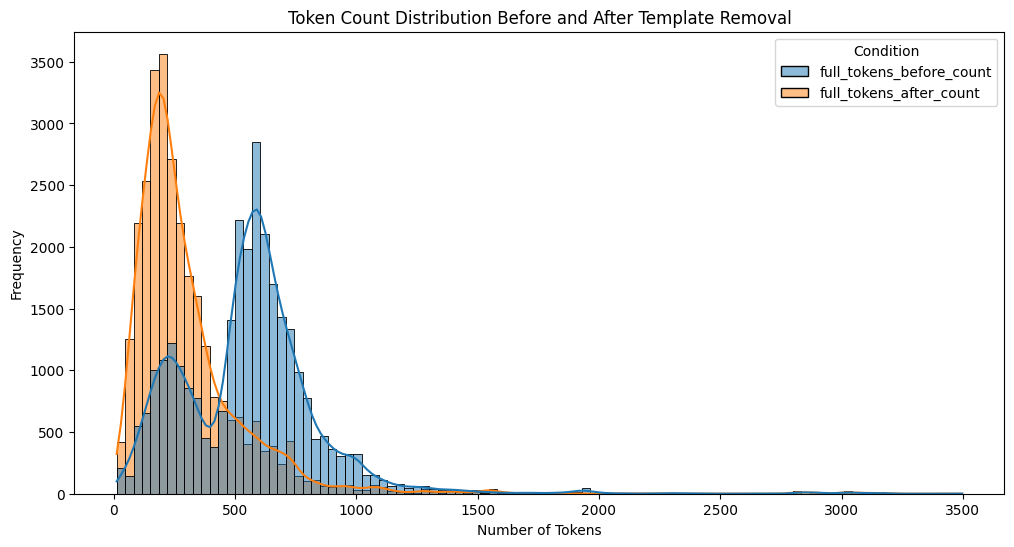

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임을 길게 변환하여 Seaborn에서 사용하기
df_melted = pd.melt(df, value_vars=['full_tokens_before_count', 'full_tokens_after_count'],
                    var_name='Condition', value_name='Token Count')

# 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df_melted, x='Token Count', hue='Condition', kde=True, bins=100)

# 그래프 타이틀과 레이블 설정
plt.title('Token Count Distribution Before and After Template Removal')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [41]:
import numpy as np

# 리뷰의 총 개수 계산
total_reviews = len(df)

# 512개 이하의 토큰을 가진 리뷰의 개수
processable_reviews = np.sum(df['full_tokens_after_count'] <= 512)

# 512개 이상의 토큰을 가진 리뷰의 개수
unprocessed_reviews = total_reviews - processable_reviews

# 비율 계산
percentage_under_512 = (processable_reviews / total_reviews) * 100
percentage_over_512 = (unprocessed_reviews / total_reviews) * 100

# 결과 출력
print(f"전체 리뷰 개수: {total_reviews}")
print(f"512개 이하의 토큰을 가진 리뷰 개수: {processable_reviews} ({percentage_under_512:.2f}%)")
print(f"512개 이상의 토큰을 가진 리뷰 개수: {unprocessed_reviews} ({percentage_over_512:.2f}%)")

전체 리뷰 개수: 29185
512개 이하의 토큰을 가진 리뷰 개수: 25200 (86.35%)
512개 이상의 토큰을 가진 리뷰 개수: 3985 (13.65%)


In [42]:
tokenizer('판매 톰브라운 에디션 플립3 판매 합니다 급 처분 액정교체하고판매합니다 안녕하세요 톰브라운 에디션 플립3 판매 합니다 휴대폰 단품으로 판매 합니다 정품 케이스 포함해서 판매 합니다 상태는 4월27일날 삼성에서 메인보드 제외 하고 액정 부터 올 교체 했습니다 교체 받고 여러 사진 올린 상태이니 사진 참고 해주세요 사진 보시면 영수증 사진도 첨부 했습니다 휴대폰은 상태는 새폰처럼 상태 좋습니다 새폰이나 마찬가지 입니다 판매 가격은 65만윈 판매 하려고 합니다 이유있는 네고 가능 합니다 몇번 사용 했던 정품 케이스 하나 같이 챙겨드리겠습니다 케이스 상태 좋습니다 가능하면 직거래 위주로. 거래를 하고 판매 하고 싶은 마음 입니다', return_tensors='pt', truncation=False, padding=False)['input_ids'][0]

tensor([49406,   169,   234,   238, 28024,   353,   169,   228,   108,   167,
          116, 17003,   251,   120, 18541,   368, 37622,   167,   242,   242,
          168,   227,   502, 29450, 17003,    99,   377,   274,   169,   234,
          238, 28024,   353, 15197,   102, 33708, 13094,   353, 32495,   487,
          168,   110,   246,   167,   114,   482, 16071,    94, 34725, 31871,
          238,   168,   110,   112, 33992, 36216,   254,   169,   234,   238,
        28024,    97, 15197,   102, 33708, 13094,   353, 16071,   230,   167,
          227,   243, 33992, 15074,   116, 18541,   498,   169,   228,   108,
          167,   116, 17003,   251,   120, 18541,   368, 37622,   167,   242,
          242,   168,   227,   502, 29450, 17003,    99,   377,   274,   169,
          234,   238, 28024,   353, 15197,   102, 33708, 13094,   353,   169,
          250,   112,   167,   234,   222,   169,   237,   364, 13094,   101,
          169,   240,   230, 20909,   120,   167,    94,   506, 

In [119]:
tokenizer

CLIPTokenizer(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_length=77, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	49407: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [45]:
# 데이터베이스 연결 설정
conn = psycopg2.connect(
    dbname="fellowship",
    user="postgres",
    password="9832",
    host="15.164.219.167",
    port="5432"
)

cur = conn.cursor()

# 1. 테이블에 새로운 열 추가 (만약 아직 없는 경우)
alter_query = """
ALTER TABLE cellphone
ADD COLUMN cleaned_text VARCHAR;
"""
cur.execute(alter_query)
conn.commit()

# 2. 데이터프레임에서 데이터 추출 및 업데이트
for index, row in df.iterrows():
    update_query = """
    UPDATE cellphone
    SET cleaned_text = %s
    WHERE id = %s;
    """
    cur.execute(update_query, (row['cleaned_combined_text'], row['id']))

# 변경 사항 커밋 및 연결 종료
conn.commit()
cur.close()
conn.close()